In [212]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


In [213]:
neo = pd.read_excel('E:\\SOFT\\General_Subjects\\artificial_intelligence\\AI_projects\\dataset\\nearest_erth_objects\\neo_v2.xlsx')

In [214]:
neo.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


In [215]:
neo.isnull().sum()
neo.isna().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [216]:
neo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [217]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression(max_iter=800)))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

In [218]:
feature_names = ['id','est_diameter_min','est_diameter_max','relative_velocity','miss_distance','absolute_magnitude']
X = neo[feature_names]
y = neo.hazardous

In [219]:
neo.replace(to_replace=True, value=1, regex=True, inplace=True)

In [220]:
neo.replace(to_replace=False, value=0, regex=True,inplace=True)

In [221]:
neo

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,0,16.73,0
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,0,20.00,1
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,0,17.83,0
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,0,22.20,0
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,0,20.09,1
...,...,...,...,...,...,...,...,...,...,...
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,0,25.00,0
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,0,26.00,0
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,0,24.60,0
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,0,27.80,0


In [222]:
y = neo.hazardous

In [223]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = neo.hazardous, random_state=0)

In [224]:
y_train

71722    0
83361    0
69126    0
71102    0
112      0
        ..
3816     0
49334    0
69634    0
73043    0
36223    0
Name: hazardous, Length: 68127, dtype: int64

In [225]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression(max_iter=90836)))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

In [211]:
names = []
scores = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.897309
1  SVC  0.902682
2   LR  0.902682
3   DT  0.928046
4  GNB  0.891012
5   RF  0.948743
6   GB  0.920912


In [226]:
kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})

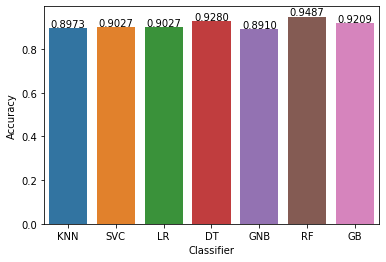

In [227]:
axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()